# Neutron tagging efficiency

In [1]:
import numpy as np
import root_pandas as rpd
import matplotlib.pyplot as plt

%matplotlib inline

read pam output file

In [2]:
df = rpd.read_root('cryostat_neutron_octagon.root')

print('pamn output has the following branches.')
for branch in df:
    print('-', branch)

pamn output has the following branches.
- ns
- NR
- Ed
- secondS2
- pmthitid
- fv
- nhits


### apply two conditions; classic "dangerous" condition and "less strict" condition.
dangerous condition
- only single scatter, or, at least one scatter and second S2 < 100
- first scatter is nuclear recoil
- in fiducial volume
- 4 keV < energy deposit < 50 keV

less strict condition
- at least one scatter
- first scatter is nuclear recoil
- no fiducial cut
- no energy cut

In [3]:
df1 = df.query('((ns == 1) | ((ns > 1) & (secondS2 < 100))) & (NR == 1) & (fv < 1) & ((Ed > 4) & (Ed < 50))')
df2 = df.query('(ns > 0) & (NR == 1)')

draw neutron tagging efficiency

- tagging efficiency for i-fold coincidence is calculated by integrating N-hits distribution after i-hits

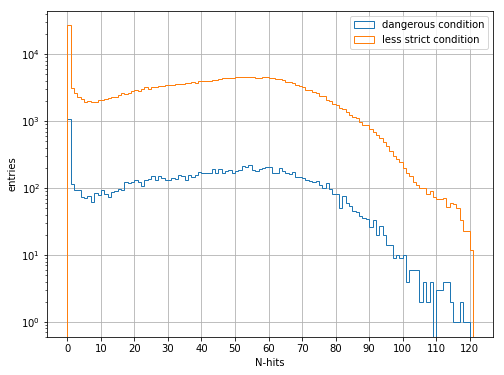

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

hist1 = plt.hist(df1.nhits, bins=121, range=(0, 121), histtype='step', label='dangerous condition')
hist2 = plt.hist(df2.nhits, bins=121, range=(0, 121), histtype='step', label='less strict condition')

ax.set_xticks([i*10 for i in range(13)])
ax.set_xlabel('N-hits')
ax.set_ylabel('entries')
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.grid()
ax.legend()

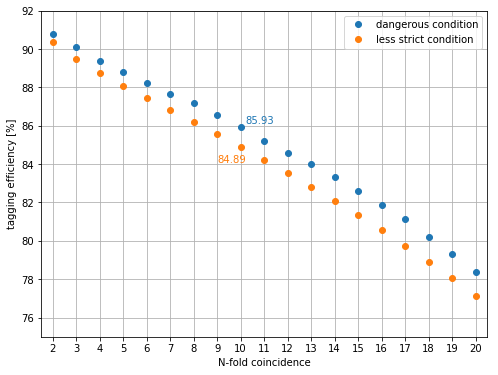

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

nfold = hist1[1][0:121]

nhits1 = hist1[0]
nhits2 = hist2[0]

tageff1 = np.array([sum(nhits1[i:121])/sum(nhits1) for i in range(121)])*100
tageff2 = np.array([sum(nhits2[i:121])/sum(nhits2) for i in range(121)])*100

ax.plot(nfold, tageff1, 'o', label='dangerous condition')
ax.plot(nfold, tageff2, 'o', label='less strict condition')

ax.text(10.2, tageff1[10]+0.2, round(tageff1[10], 2), color='C0')
ax.text(9.00, tageff2[10]-0.8, round(tageff2[10], 2), color='C1')

ax.set_xlabel('N-fold coincidence')
ax.set_ylabel('tagging efficiency [%]')

ax.set_xticks([i for i in range(122)])
ax.set_xlim(1.5, 20.5)
ax.set_ylim(75, 92)
ax.set_axisbelow(True)
ax.grid()
ax.legend()